# Building a Regression Model in Keras

## A. Build a baseline model 

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the **adam** optimizer and the **mean squared error**  as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) helper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the **mean and the standard deviation of the mean squared errors**.



### Import libraries that are required for the solution

In [4]:
import keras
import pandas as pd
import numpy as np

# for building neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

# for splitting data using scikit-learn library
from sklearn.model_selection import train_test_split

# for evaluating the model with mean squared error function from scikit-learn
from sklearn.metrics import mean_squared_error

# for visualizing the mean squared errors with statistics
import matplotlib.pyplot as plt

import warnings

2025-02-26 23:06:48.231987: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Matplotlib is building the font cache; this may take a moment.


### Read the data

The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:

- Cement
- Blast furnace slag
- Fly ash
- Water
- Superplasticizer
- Coarse aggregate
- Fine aggregate

Download the data and read it into a pandas dataframe

In [7]:
filepath = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
concrete_data = pd.read_csv(filepath)
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Check how many data points the data have

In [9]:
concrete_data.shape

(1030, 9)

Check the data for any missing values

In [11]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [12]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Split data into predictors and target

The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.

In [16]:
concrete_data_columns = concrete_data.columns

In [17]:
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]
target = concrete_data['Strength']

Quick Sanity check on predictors and target dataframes

In [19]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [20]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Let's save the number of predictors to *n_cols* since we will need this number when building our network.

In [22]:
n_cols = predictors.shape[1]

### A. Build Neural Network

Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.

In [25]:
def regression_model():
    # Create a model with 10 hidden layers, ReLU activation function,
    #   use adam optimizer, and the mean squared error as loss function
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

### 1. Split the data to training and testing

Randomly splitting the data into a training and test sets by holding 30% of the data for testing using **train_test_split** function from the scikit-learn module.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=0.3,random_state=42)

### 2. Train the model

Train the model on the training data using **50 epochs**.

In [31]:
# build the model
model = regression_model()
model.fit(X_train, y_train, epochs=50, verbose=2)

Epoch 1/50
23/23 - 1s - 35ms/step - loss: 3232.1099
Epoch 2/50
23/23 - 0s - 2ms/step - loss: 1142.1029
Epoch 3/50
23/23 - 0s - 2ms/step - loss: 831.4598
Epoch 4/50
23/23 - 0s - 2ms/step - loss: 774.9940
Epoch 5/50
23/23 - 0s - 2ms/step - loss: 751.6467
Epoch 6/50
23/23 - 0s - 2ms/step - loss: 731.0726
Epoch 7/50
23/23 - 0s - 2ms/step - loss: 707.5297
Epoch 8/50
23/23 - 0s - 2ms/step - loss: 684.1231
Epoch 9/50
23/23 - 0s - 2ms/step - loss: 661.7139
Epoch 10/50
23/23 - 0s - 2ms/step - loss: 639.0328
Epoch 11/50
23/23 - 0s - 2ms/step - loss: 618.6678
Epoch 12/50
23/23 - 0s - 2ms/step - loss: 599.5742
Epoch 13/50
23/23 - 0s - 2ms/step - loss: 580.8453
Epoch 14/50
23/23 - 0s - 2ms/step - loss: 562.6025
Epoch 15/50
23/23 - 0s - 2ms/step - loss: 544.9312
Epoch 16/50
23/23 - 0s - 2ms/step - loss: 527.7510
Epoch 17/50
23/23 - 0s - 2ms/step - loss: 510.8153
Epoch 18/50
23/23 - 0s - 2ms/step - loss: 494.2917
Epoch 19/50
23/23 - 0s - 2ms/step - loss: 478.0441
Epoch 20/50
23/23 - 0s - 2ms/step - l

### 3. Evaluate the Model on the test data

 Evaluating the model on the test data 

In [34]:
# Prediction
predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


computing the mean squared error between the predicted concrete strength and the actual concrete strength using **mean_squared_error function** from Scikit-learn. 

In [36]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error after testing the model: {mse}")

Mean Squared Error after testing the model: 290.5850511269962


### 4. Repeating the steps 1-3, 50 times

In [38]:
# Empty list for storing al MSE values
mse_scores =[]

for i in range(50):
    print(f"Step # {i}")
    # 1. Randomly split the data by holding 30% of the data for testing
    X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=0.3,random_state=42)

    # 2. Train the model for 50 epochs
    model = regression_model()
    model.fit(X_train, y_train, epochs=50, verbose=0)

    predictions = model.predict(X_test)

    # 3. Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

print(mse_scores)

Step # 0
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 1
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 4
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 6
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Step # 7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 9
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 11
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 12
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 13
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 14
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 16
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 17
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 18
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step # 20


### 5. Reporting the mean and standard deviation of the mean squared errors

In [195]:
# Calculate the mean and standard deviation
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Print the values on screen
print(f"Mean of MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")

Mean of MSE: 518.462444944406
Standard Deviation of MSE: 581.1953007451983


In [121]:
# Create a dataframe with the MSE scores
x_values = np.arange(len(mse_scores))

df_unnormalized = pd.DataFrame({
    'iteration': x_values,
    'mse': mse_scores
})

# Save to CSV
df_unnormalized.to_csv('neural_network_regression_unnormalized_mse.csv', index=False)

#### Visual representation of Mean Squared Errors with mean and Standard Deviation

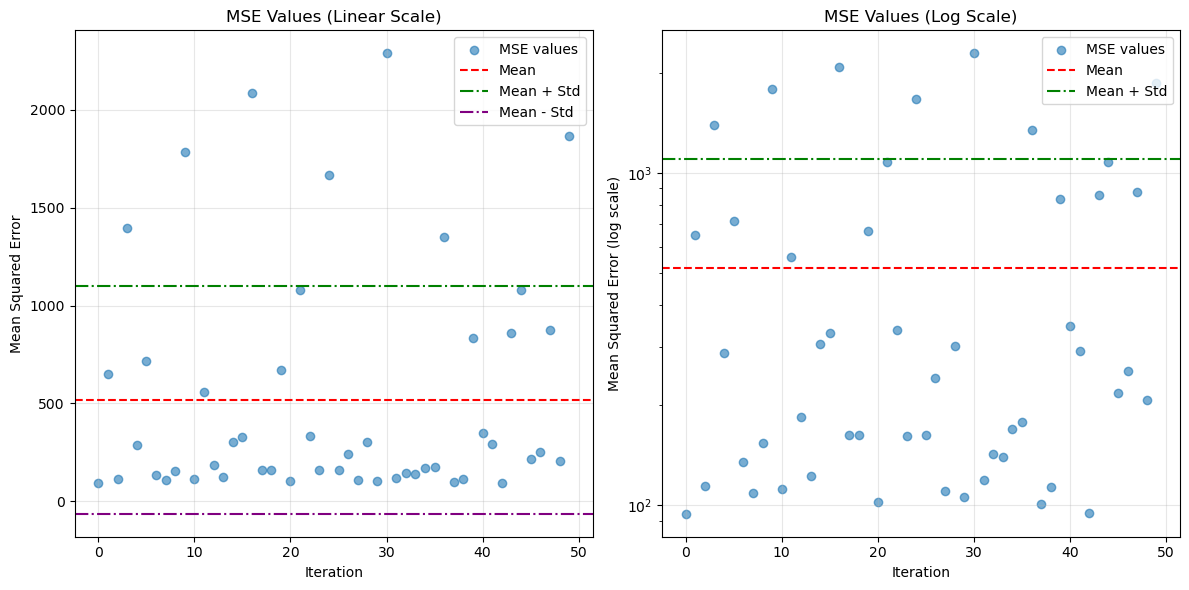

In [124]:
plt.figure(figsize=(12, 6))
# Regular scale plot
plt.subplot(1, 2, 1)
plt.scatter(x_values, mse_scores, alpha=0.6, label='MSE values')
plt.axhline(y=mean_mse, color='red', linestyle='--', label='Mean')
plt.axhline(y=mean_mse + std_mse, color='green', linestyle='-.', label='Mean + Std')
plt.axhline(y=mean_mse - std_mse, color='purple', linestyle='-.', label='Mean - Std')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE Values (Linear Scale)')
plt.legend()
plt.grid(True, alpha=0.3)

# Log scale plot
plt.subplot(1, 2, 2)
plt.scatter(x_values, mse_scores, alpha=0.6, label='MSE values')
plt.axhline(y=mean_mse, color='red', linestyle='--', label='Mean')
plt.axhline(y=mean_mse + std_mse, color='green', linestyle='-.', label='Mean + Std')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (log scale)')
plt.title('MSE Values (Log Scale)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()

### Result

The unnormalized data shows:
- `High variability in MSE (std = 581.20)`
- `Mean MSE of 518.46`
- Several extreme spikes (>1500)
- `The negative mean-std boundary (518.46 - 581.20 < 0) suggests poor model stability`.

This high variability and potential for negative boundaries indicates that normalization could help stabilize the model's performance.
